# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bardai
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | dudinka
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | labytnangi
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | laguna
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | kudat
Processing Record 12 of Set 1 | san ignacio de velasco
Processing Record 13 of Set 1 | alotau
City not found. Skipping...
Processing Record 14 of Set 1 | fruita
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | tralee
Processing Record 17 of Set 1 | erenhot
Processing Record 18 of Set 1 | merizo village
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | remire-montjoly
Processing Record 21 of Set 1 | saudarkrokur
Processing Record 22 of 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bardai,11.6500,7.2333,34.50,13,96,3.81,NG,1699622119
1,jamestown,42.0970,-79.2353,8.08,68,0,3.13,US,1699622021
2,dudinka,69.4058,86.1778,-7.40,93,100,12.07,RU,1699622120
3,stanley,54.8680,-1.6985,8.07,74,20,4.63,GB,1699621942
4,bethel,41.3712,-73.4140,9.72,67,40,3.09,US,1699621975


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bardai,11.6500,7.2333,34.50,13,96,3.81,NG,1699622119
1,jamestown,42.0970,-79.2353,8.08,68,0,3.13,US,1699622021
2,dudinka,69.4058,86.1778,-7.40,93,100,12.07,RU,1699622120
3,stanley,54.8680,-1.6985,8.07,74,20,4.63,GB,1699621942
4,bethel,41.3712,-73.4140,9.72,67,40,3.09,US,1699621975


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

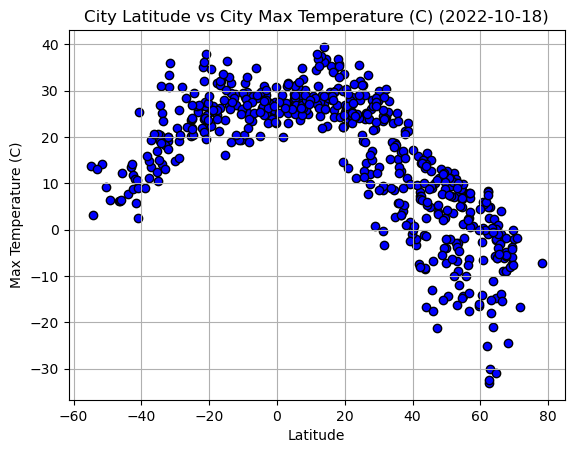

In [9]:
# Build scatter plot for latitude vs. temperature
val_x = city_data_df["Lat"]
val_y_temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(val_x, val_y_temp, marker="o", facecolors = 'blue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs City Max Temperature (C) (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

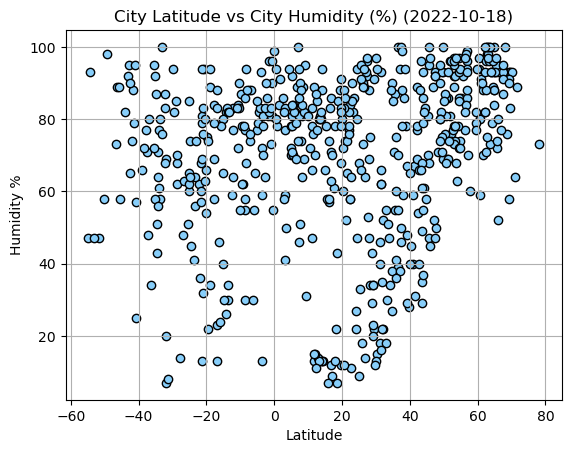

In [10]:
# Build the scatter plots for latitude vs. humidity
val_x = city_data_df["Lat"]
val_y_humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(val_x, val_y_humidity, marker="o", facecolors = 'lightskyblue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs City Humidity (%) (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

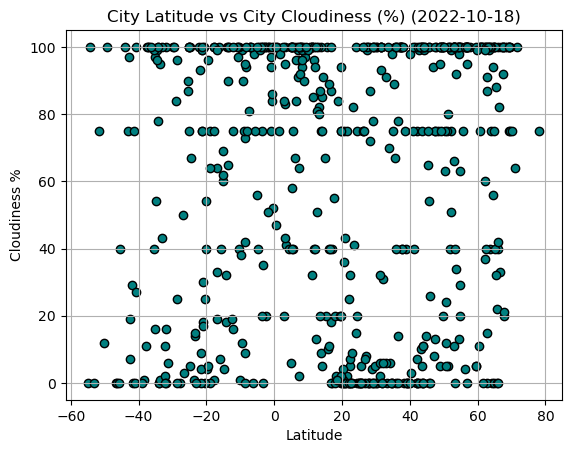

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", facecolors = 'teal', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs City Cloudiness (%) (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

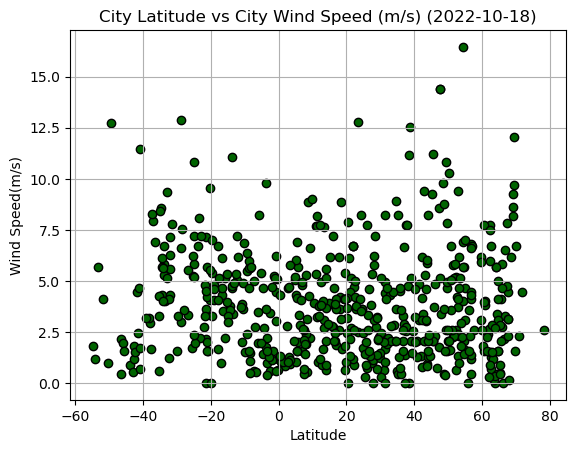

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", facecolors = "darkgreen", edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs City Wind Speed (m/s) (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      3.838076
1      3.703450
2      3.582701
3      3.646982
4      3.706660
         ...   
577    3.772267
578    3.693710
579    3.955780
580    3.774257
581    3.816778
Name: Lat, Length: 582, dtype: float64


In [14]:
# Define a function to create Linear Regression plots
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = -0.0x + 3.89


In [39]:
def plot_function(x,y,location,dog):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Incorporate the other graph properties
    plt.scatter(x, y, marker="o", facecolors = 'blue', edgecolors = 'black')
    plt.plot(x, regress_values,"r-")
    plt.annotate(line_eq,location,fontsize=15,color='red')
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (C)")
    plt.title(dog)
    print(f"The r-value is:{rvalue}")
    plt.grid()

    # Show plot
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bardai,11.6500,7.2333,34.50,13,96,3.81,NG,1699622119
1,jamestown,42.0970,-79.2353,8.08,68,0,3.13,US,1699622021
2,dudinka,69.4058,86.1778,-7.40,93,100,12.07,RU,1699622120
3,stanley,54.8680,-1.6985,8.07,74,20,4.63,GB,1699621942
4,bethel,41.3712,-73.4140,9.72,67,40,3.09,US,1699621975


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,coquimbo,-29.9533,-71.3436,14.87,94,100,1.56,CL,1699622048
9,puerto natales,-51.7236,-72.4875,14.25,47,75,4.12,CL,1699622126
11,san ignacio de velasco,-16.3667,-60.9500,32.02,46,100,3.52,BO,1699622128
13,adamstown,-25.0660,-130.1015,21.90,85,100,5.84,PN,1699622131
17,ushuaia,-54.8000,-68.3000,13.79,47,0,1.79,AR,1699621851


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8443812802767482


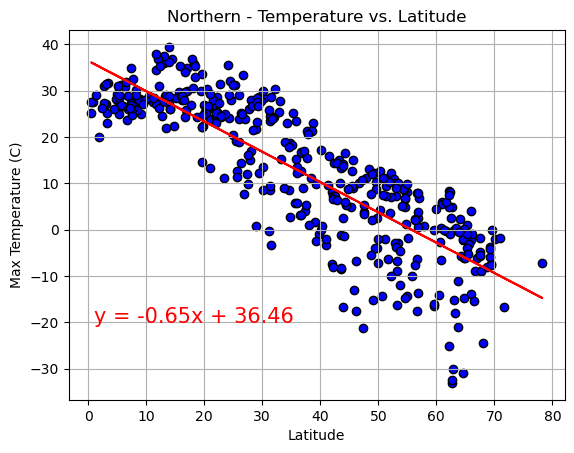

In [51]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
plot_function(x,y,(1,-20),"Northern - Temperature vs. Latitude")

The r-value is:0.6737740232358151


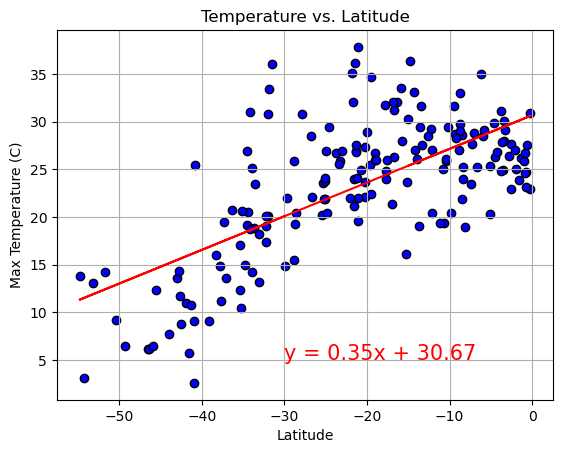

In [44]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]
plot_function(x,y,(-30,5),"Temperature vs. Latitude")

**Discussion about the linear relationship:** In the northern hemisphere the r-value of -0.844 suggests that there is a strong correlation between latitude and max temp. In the southern hemisphere the r-value of 0.673 suggests that there is a weak to moderate correlation between latitude and max temp.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:-0.4421850546948572


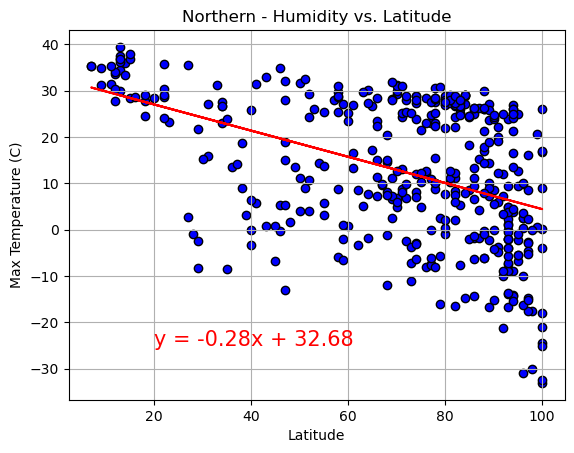

In [52]:
# Northern Hemisphere
x=northern_hemi_df["Humidity"]
y=northern_hemi_df["Max Temp"]
plot_function(x,y,(20,-25),"Northern - Humidity vs. Latitude")

The r-value is:-0.4872995667458682


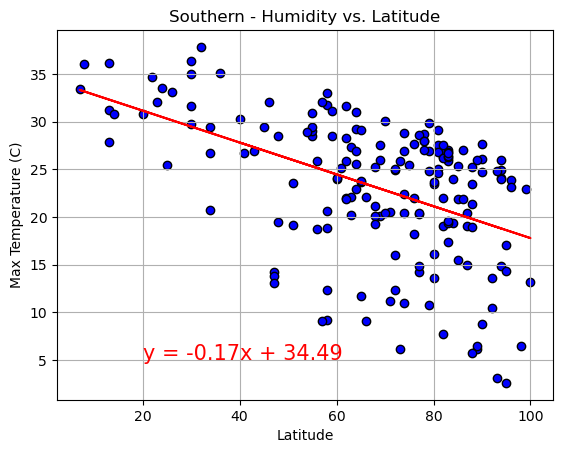

In [46]:
# Southern Hemisphere
x=southern_hemi_df["Humidity"]
y=southern_hemi_df["Max Temp"]
plot_function(x,y,(20,5),"Southern - Humidity vs. Latitude")

**Discussion about the linear relationship:** In the northern hemisphere the r-value of -0.442 suggests that there is a negative correlation between latitude and humidity.  In southern hemispher the r-value of -0.487 suggests that there is a negative correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:-0.09824826539165528


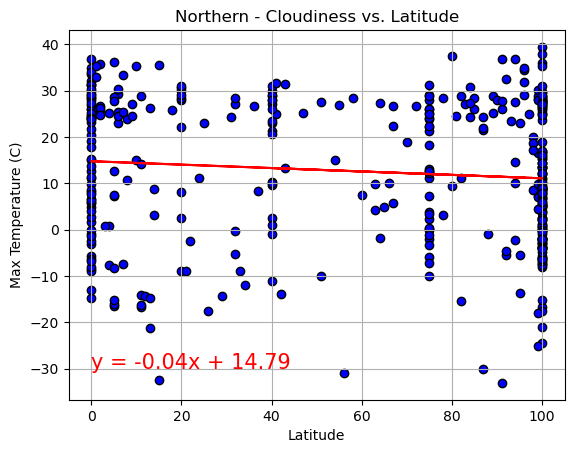

In [47]:
# Northern Hemisphere
x=northern_hemi_df["Cloudiness"]
y=northern_hemi_df["Max Temp"]
plot_function(x,y,(0,-30),"Northern - Cloudiness vs. Latitude")

The r-value is:0.014893475060830497


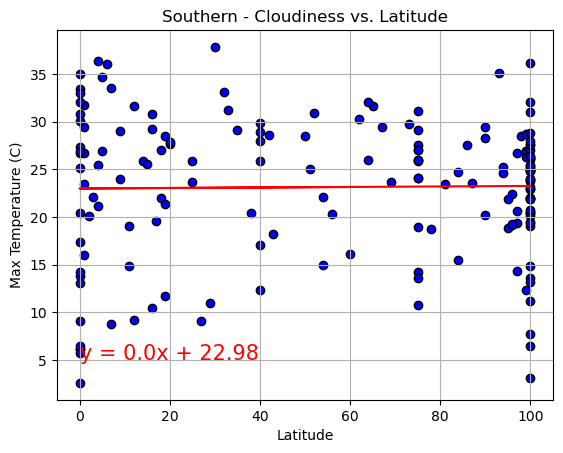

In [48]:
# Southern Hemisphere
x=southern_hemi_df["Cloudiness"]
y=southern_hemi_df["Max Temp"]
plot_function(x,y,(0,5),"Southern - Cloudiness vs. Latitude")

**Discussion about the linear relationship:** In the northern hemisphere the r-value of -0.098 suggests that there is a negative correlation between latitude and cloudiness.  In southern hemisphere the r-value of 0.014 suggests that there is a weak correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.11119353229402802


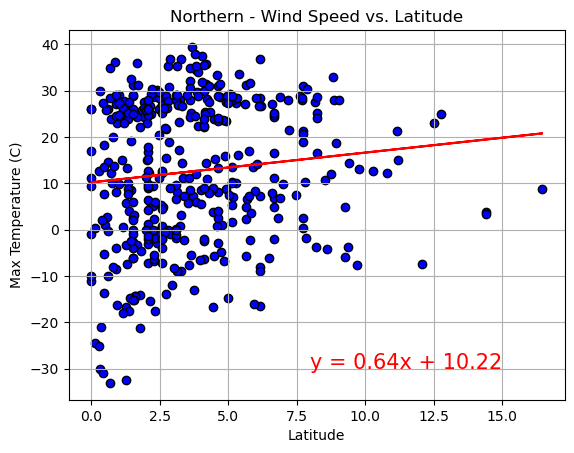

In [49]:
# Northern Hemisphere
x=northern_hemi_df["Wind Speed"]
y=northern_hemi_df["Max Temp"]
plot_function(x,y,(8,-30),"Northern - Wind Speed vs. Latitude")

The r-value is:0.13889023257312477


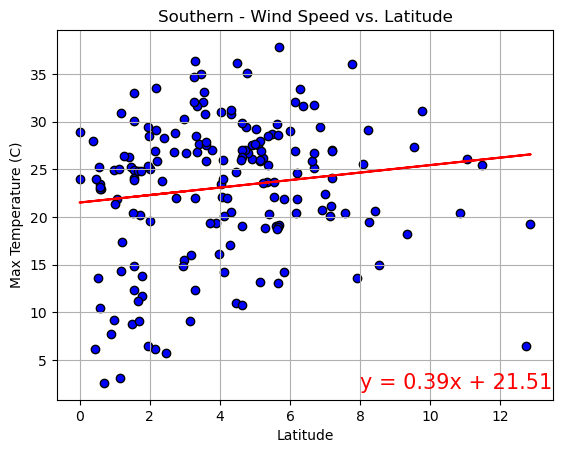

In [50]:
# Southern Hemisphere
x=southern_hemi_df["Wind Speed"]
y=southern_hemi_df["Max Temp"]
plot_function(x,y,(8,2),"Southern - Wind Speed vs. Latitude")

**Discussion about the linear relationship:** In the northern hemisphere the r-value of 0.111 suggests that there is a slightly positive correlation between latitude and wind speed.  In southern hemisphere the r-value of 0.138 suggests that there is a slighty positive correlation between latitude and wind speed.